In [1]:

import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_log_error, make_scorer

from sklearn.linear_model import LinearRegression  
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
# Seeing the shape of the data.
train.shape

(10886, 12)

In [6]:
# Seeing if there are dublicated.
train.duplicated().sum()

0

In [7]:
# seeing if there are null values.
train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
# Seeing information about data.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
# Convert the 'datetime' column to datetime format
train['datetime'] = pd.to_datetime(train['datetime'])

In [10]:
# Seeing information about data.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [11]:
# Extract the year from the 'datetime' column and create a new 'year' column
train['year'] = train['datetime'].dt.year

# Extract the month as its name from the 'datetime' column and create a new 'month' column
train['month'] = train['datetime'].dt.month_name()

# Extract the day as its name from the 'datetime' column and create a new 'day' column
train['day'] = train['datetime'].dt.day_name()

# Extract the hour from the 'datetime' column and create a new 'hour' column
train['hour'] = train['datetime'].dt.hour

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,January,Saturday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,January,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,January,Saturday,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,January,Saturday,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,January,Saturday,4


In [12]:

train['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}, inplace=True)

train['holiday'].replace({1: 'Holiday', 0: 'Not Holiday'}, inplace=True)

train['workingday'].replace({1: 'Workingday', 0: 'Not Workingday'}, inplace=True)

train['weather'].replace({1: 'Clear', 2: 'Mist', 3: 'Rain', 4: 'Snow'}, inplace=True)

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,Spring,Not Holiday,Not Workingday,Clear,9.84,14.395,81,0.0,3,13,16,2011,January,Saturday,0
1,2011-01-01 01:00:00,Spring,Not Holiday,Not Workingday,Clear,9.02,13.635,80,0.0,8,32,40,2011,January,Saturday,1
2,2011-01-01 02:00:00,Spring,Not Holiday,Not Workingday,Clear,9.02,13.635,80,0.0,5,27,32,2011,January,Saturday,2
3,2011-01-01 03:00:00,Spring,Not Holiday,Not Workingday,Clear,9.84,14.395,75,0.0,3,10,13,2011,January,Saturday,3
4,2011-01-01 04:00:00,Spring,Not Holiday,Not Workingday,Clear,9.84,14.395,75,0.0,0,1,1,2011,January,Saturday,4


In [13]:
# Categorical columns.
categorical_features = train[['season', 'holiday', 'workingday', 'weather',  'year', 'month', 'day', 'hour']]

for i in categorical_features:
    print(train[i].value_counts())
    print('-' * 50)

Winter    2734
Summer    2733
Fall      2733
Spring    2686
Name: season, dtype: int64
--------------------------------------------------
Not Holiday    10575
Holiday          311
Name: holiday, dtype: int64
--------------------------------------------------
Workingday        7412
Not Workingday    3474
Name: workingday, dtype: int64
--------------------------------------------------
Clear    7192
Mist     2834
Rain      859
Snow        1
Name: weather, dtype: int64
--------------------------------------------------
2012    5464
2011    5422
Name: year, dtype: int64
--------------------------------------------------
May          912
June         912
July         912
August       912
December     912
October      911
November     911
April        909
September    909
February     901
March        901
January      884
Name: month, dtype: int64
--------------------------------------------------
Saturday     1584
Sunday       1579
Thursday     1553
Monday       1551
Wednesday    1551
Tuesd

In [14]:
# Define a mapping dictionary to combine the clusters
cluster_mapping = {"Snow" : "Rain"}

# Update the "grade" column with the new cluster labels
train['weather'] = train['weather'].replace(cluster_mapping)

# Check the value_counts for the weather after replacing
train['weather'].value_counts()

Clear    7192
Mist     2834
Rain      860
Name: weather, dtype: int64

In [15]:
# Filter rows where 'workingday' is equal to 'Workingday'
workingDay = train[train['workingday'] == 'Workingday']

# Filter rows where 'holiday' is equal to 'Holiday'
holiDay = train[train['holiday'] == 'Holiday']

# Filter rows where 'holiday' is not 'Holiday' and 'workingday' is not 'Workingday'
weekEnd = train[(train['holiday'] == 'Not Holiday') & (train['workingday'] == 'Not Workingday')]

In [16]:
# Numerical columns.
numerical_features = train[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]

# calculate descriptive statistics for numerical values.
numerical_features.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [17]:
# Get the count of the minimum value
count_of_min_value = train[train['humidity']==0].shape[0]

count_of_min_value

22

In [18]:
# Filter rows with the minimum value
min_value_rows = train[train['humidity'] == 0]

min_value_rows

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
1091,2011-03-10 00:00:00,Spring,Not Holiday,Workingday,Rain,13.94,15.910,0,16.9979,3,0,3,2011,March,Thursday,0
1092,2011-03-10 01:00:00,Spring,Not Holiday,Workingday,Rain,13.94,15.910,0,16.9979,0,2,2,2011,March,Thursday,1
1093,2011-03-10 02:00:00,Spring,Not Holiday,Workingday,Rain,13.94,15.910,0,16.9979,0,1,1,2011,March,Thursday,2
1094,2011-03-10 05:00:00,Spring,Not Holiday,Workingday,Rain,14.76,17.425,0,12.9980,1,2,3,2011,March,Thursday,5
1095,2011-03-10 06:00:00,Spring,Not Holiday,Workingday,Rain,14.76,16.665,0,22.0028,0,12,12,2011,March,Thursday,6
1096,2011-03-10 07:00:00,Spring,Not Holiday,Workingday,Rain,15.58,19.695,0,15.0013,1,36,37,2011,March,Thursday,7
1097,2011-03-10 08:00:00,Spring,Not Holiday,Workingday,Rain,15.58,19.695,0,19.0012,1,43,44,2011,March,Thursday,8
1098,2011-03-10 09:00:00,Spring,Not Holiday,Workingday,Rain,16.40,20.455,0,15.0013,1,23,24,2011,March,Thursday,9
1099,2011-03-10 10:00:00,Spring,Not Holiday,Workingday,Rain,16.40,20.455,0,11.0014,0,17,17,2011,March,Thursday,10
1100,2011-03-10 11:00:00,Spring,Not Holiday,Workingday,Rain,16.40,20.455,0,16.9979,6,5,11,2011,March,Thursday,11


In [19]:
# Filter rows where the weather is 'Rain'
rain_weather = train[train['weather'] == 'Rain']

# Calculate the mean humidity for rows with 'Rain' weather
mean_rain_weather_humidity = rain_weather['humidity'].mean()

# Replace 0 values in the 'humidity' column with the calculated mean for 'Rain' weather
train['humidity'] = train['humidity'].replace(0, mean_rain_weather_humidity)

# Check the minimum value in the 'humidity' column after replacing 0 values
train['humidity'].min()

8.0

In [20]:
# Get the count of the minimum value
count_of_min_value = train[train['windspeed']==0].shape[0]

count_of_min_value

1313

In [21]:
# Filter rows with the minimum value
min_value_rows = train[train['windspeed'] == 0]

min_value_rows.sample(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
4628,2011-11-05 22:00:00,Winter,Not Holiday,Not Workingday,Clear,12.30,16.665,65.0,0.0,10,72,82,2011,November,Saturday,22
4213,2011-10-07 14:00:00,Winter,Not Holiday,Workingday,Clear,25.42,31.060,50.0,0.0,77,179,256,2011,October,Friday,14
8,2011-01-01 08:00:00,Spring,Not Holiday,Not Workingday,Clear,9.84,14.395,75.0,0.0,1,7,8,2011,January,Saturday,8
4355,2011-10-13 12:00:00,Winter,Not Holiday,Workingday,Mist,25.42,28.030,88.0,0.0,10,95,105,2011,October,Thursday,12
3817,2011-09-10 01:00:00,Fall,Not Holiday,Not Workingday,Mist,25.42,27.275,94.0,0.0,16,67,83,2011,September,Saturday,1
9267,2012-09-09 12:00:00,Fall,Not Holiday,Not Workingday,Clear,27.06,31.060,47.0,0.0,247,510,757,2012,September,Sunday,12
597,2011-02-08 01:00:00,Spring,Not Holiday,Workingday,Mist,11.48,15.910,87.0,0.0,0,4,4,2011,February,Tuesday,1
8600,2012-07-19 17:00:00,Fall,Not Holiday,Workingday,Clear,35.26,39.395,41.0,0.0,93,678,771,2012,July,Thursday,17
6808,2012-04-01 23:00:00,Summer,Not Holiday,Not Workingday,Rain,18.86,22.725,72.0,0.0,10,53,63,2012,April,Sunday,23
5288,2011-12-14 10:00:00,Winter,Not Holiday,Workingday,Mist,13.12,17.425,57.0,0.0,9,133,142,2011,December,Wednesday,10


In [22]:
# Replace zero 'windspeed with the values above or below
train['windspeed'] = train['windspeed'].replace(0, method='ffill').replace(0, method='bfill')

# Check the minimum value in the 'windspeed' column after replacing 0 values
train['windspeed'].min()

6.0032

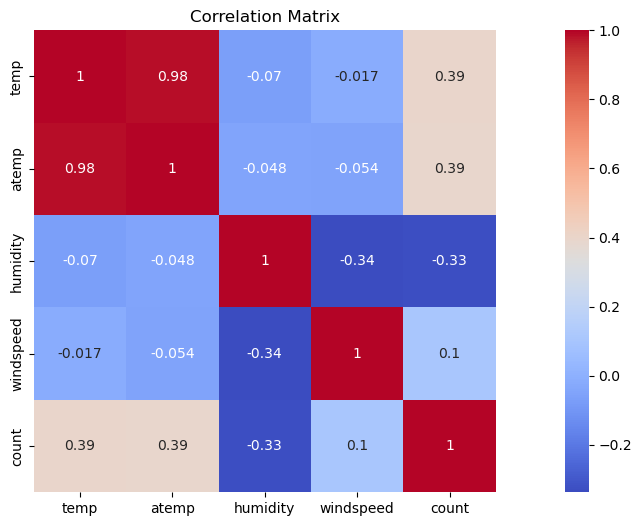

In [23]:
# Calculate the correlation matrix for the selected numerical features in the 'data' DataFrame.
correlation_matrix = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(18, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


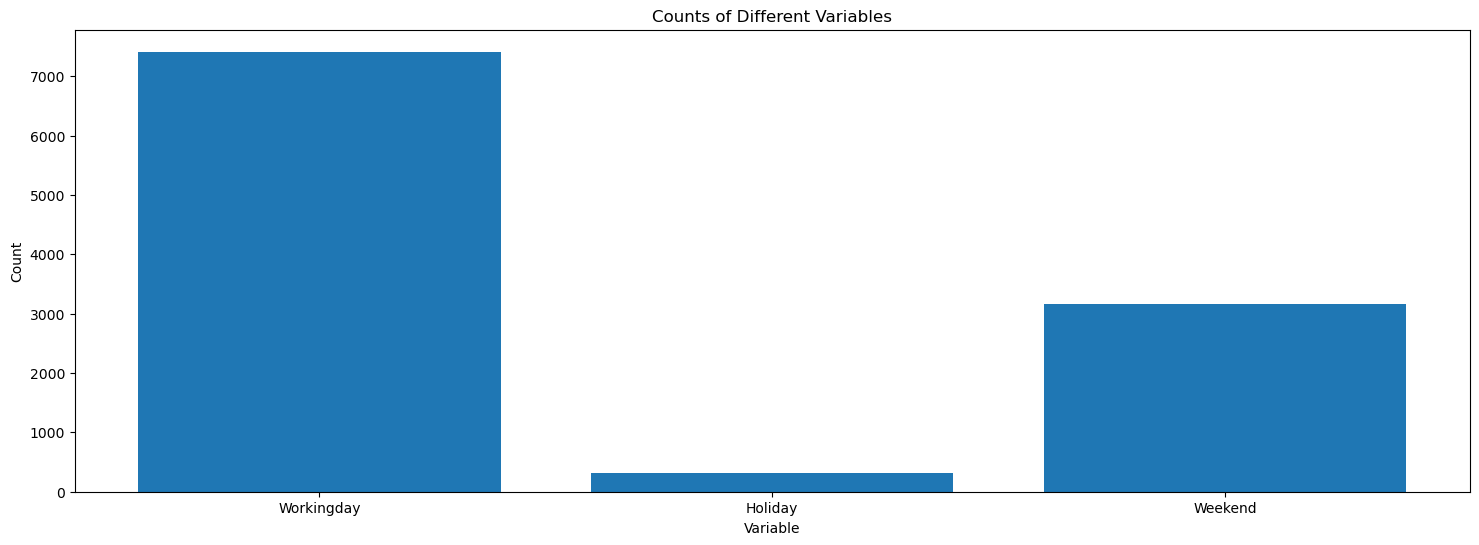

In [24]:
# Calculate counts
counts = [workingDay.shape[0], holiDay.shape[0], weekEnd.shape[0]]
labels = ['Workingday', 'Holiday', 'Weekend']

# Create a bar chart
plt.figure(figsize=(18, 6))
plt.bar(labels, counts)
plt.xlabel('Variable')
plt.ylabel('Count')
plt.title('Counts of Different Variables')
plt.show()

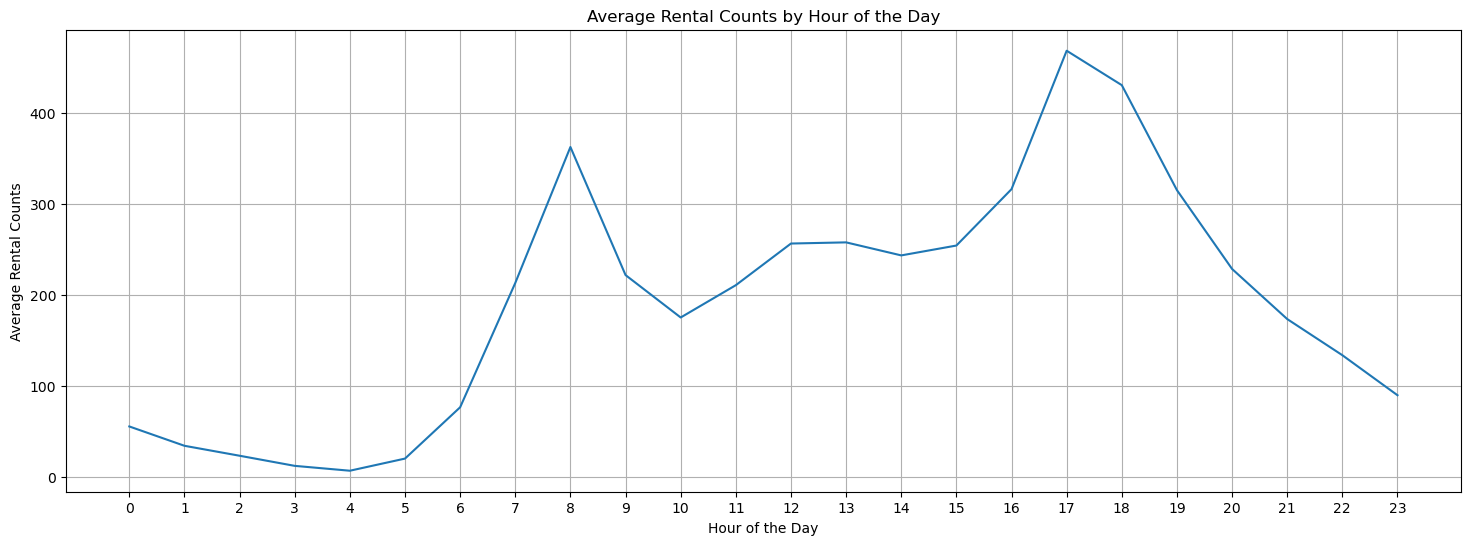

In [25]:
# Calculate the average rental counts by hour of the day
hourly_counts = train.groupby('hour')['count'].mean().reset_index()

# Create a line plot to visualize the average rental counts by hour
plt.figure(figsize=(18, 6))
sns.lineplot(x='hour', y='count', data=hourly_counts)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rental Counts')
plt.title('Average Rental Counts by Hour of the Day')
plt.xticks(ticks=range(24), labels=range(24))
plt.grid()
plt.show()

Text(0, 0.5, 'Mean Count')

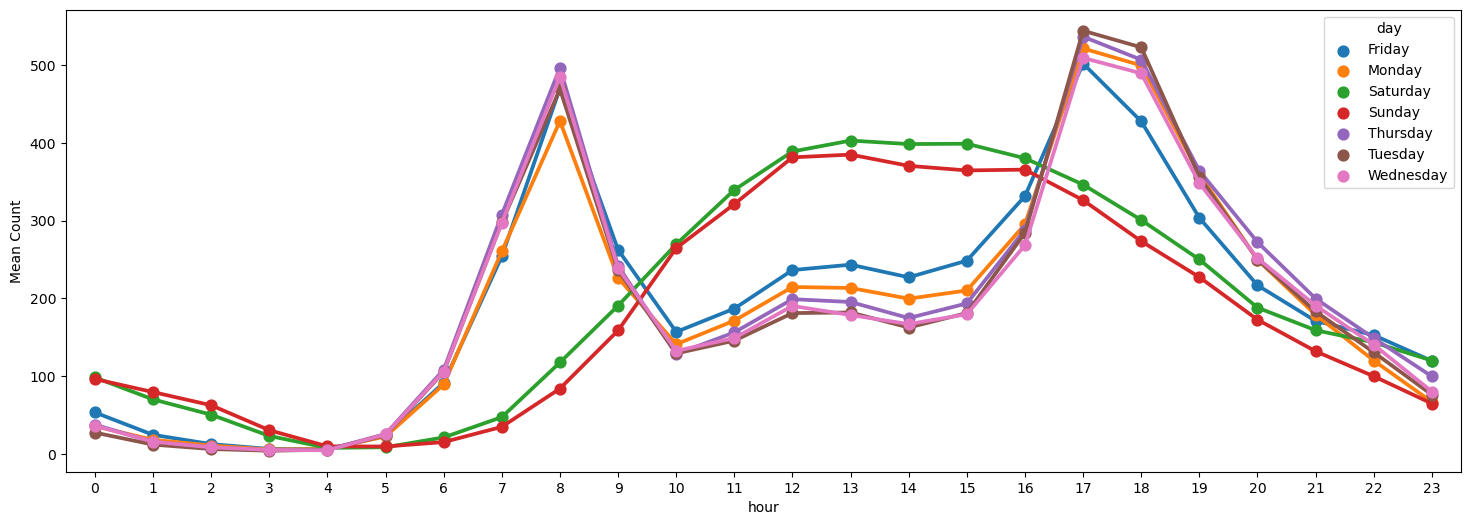

In [26]:
# Plot the mean rental counts per hour based on day of the week
plt.figure(figsize=(18, 6))
hour_day_df = train.groupby(["hour", "day"])["count"].mean().to_frame().reset_index()
ax1 = sns.pointplot(x=hour_day_df["hour"], y=hour_day_df["count"], hue=hour_day_df["day"])
ax1.set_ylabel("Mean Count")

In [27]:
# Extracting unique days from the 'day' column of the 'weekEnd' DataFrame
weekEnd['day'].unique()

array(['Saturday', 'Sunday'], dtype=object)

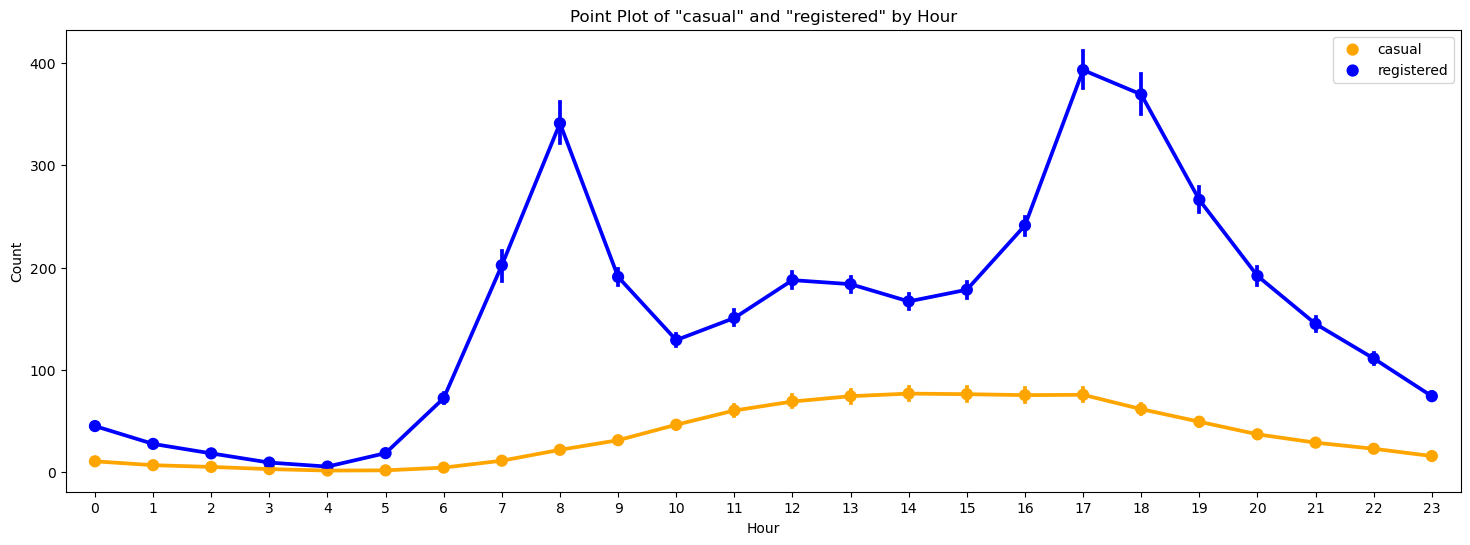

In [28]:
# Set up the plot
plt.figure(figsize=(18, 6))

# Create a point plot for 'casual' and 'registered' by 'hour'
sns.pointplot(data=train, x='hour', y='casual', color='orange', label='casual')
sns.pointplot(data=train, x='hour', y='registered', color='blue', label='registered')

plt.title('Point Plot of "casual" and "registered" by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend()

plt.show()


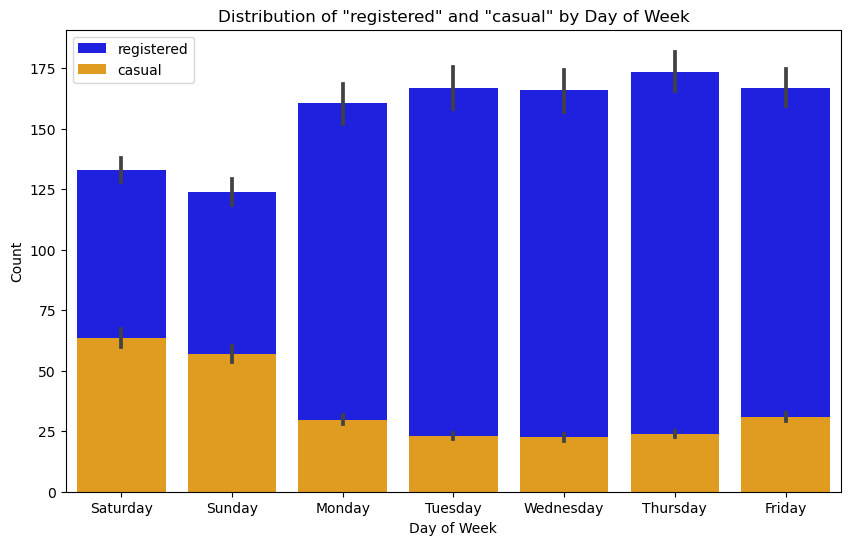

In [29]:
# Set up the plot
plt.figure(figsize=(10, 6))

# Create a bar plot to visualize distribution of 'registered' and 'casual' by 'day'
sns.barplot(data=train, x='day', y='registered', color='blue', label='registered')
sns.barplot(data=train, x='day', y='casual', color='orange', label='casual')

plt.title('Distribution of "registered" and "casual" by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.legend()

plt.show()


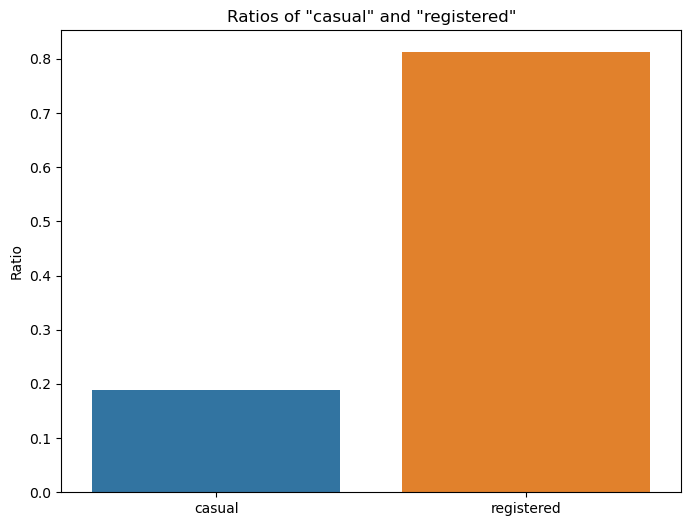

In [30]:
# Calculate the total counts for 'casual' and 'registered'
total_casual = train['casual'].sum()
total_registered = train['registered'].sum()

# Calculate the ratios
ratio_casual = total_casual / (total_casual + total_registered)
ratio_registered = total_registered / (total_casual + total_registered)

# Create a bar plot for the ratios of 'casual' and 'registered'
ratios = [ratio_casual, ratio_registered]
labels = ['casual', 'registered']

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=ratios)
plt.title('Ratios of "casual" and "registered"')
plt.ylabel('Ratio')
plt.show()

Text(0, 0.5, 'Mean Count')

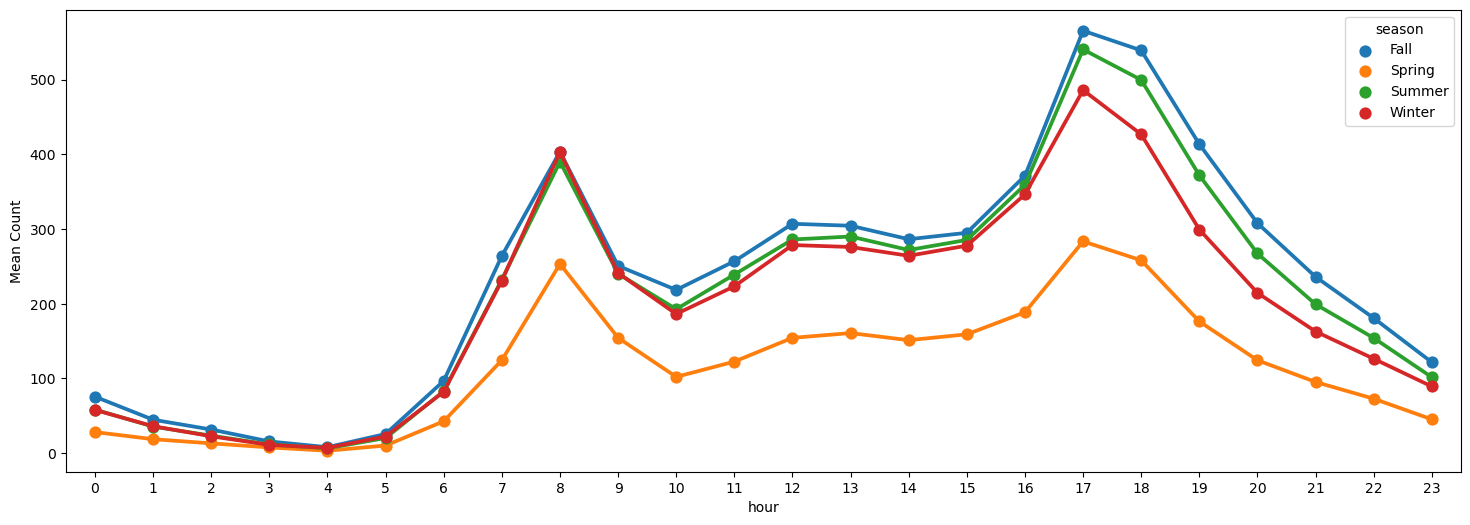

In [31]:
# Plot the mean rental counts per hour based on season
plt.figure(figsize=(18, 6))
hour_season_df = train.groupby(["hour", "season"])["count"].mean().to_frame().reset_index()
ax2 = sns.pointplot(x=hour_season_df["hour"], y=hour_season_df["count"], hue=hour_season_df["season"])
ax2.set_ylabel("Mean Count")


It's evident that peak hours for bike rentals remain consistent across seasons, likely due to work-related commuting patterns that persist regardless of the time of year. 

Interestingly, despite the consistent peak hour trend, spring stands out with lower bike rental counts. This divergence could be attributed to the prevalence of official holidays during the spring months.

In [32]:
# Count the occurrences of each season in the 'season' column of the 'holiDay' DataFrame
holiDay['season'].value_counts()

Fall      96
Winter    96
Spring    71
Summer    48
Name: season, dtype: int64

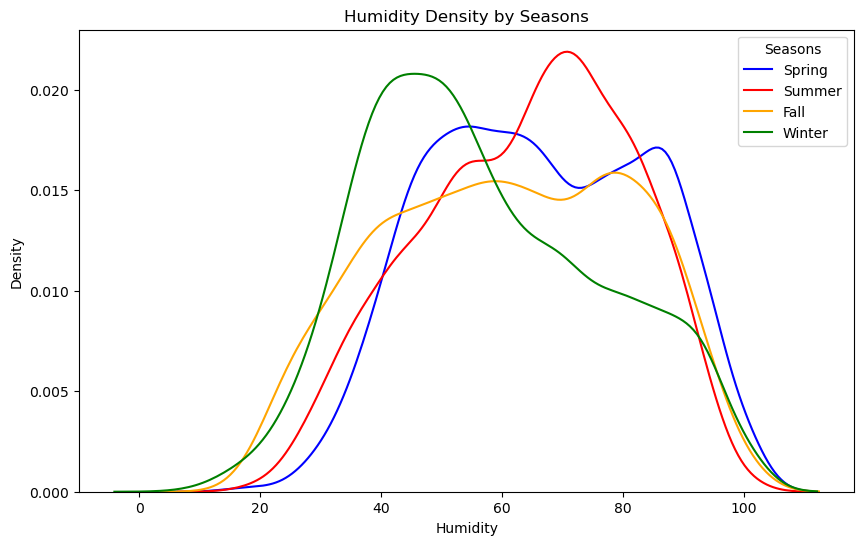

In [33]:
# Define custom colors for each season
season_colors = {
    'Spring': 'green',
    'Summer': 'orange',
    'Fall': 'red',
    'Winter': 'blue'
}

# Set up the plot
plt.figure(figsize=(10, 6))

# Create a kernel density plot of humidity by season with custom colors
sns.kdeplot(data=train, x='humidity', hue='season', common_norm=False, palette=season_colors.values())
plt.title('Humidity Density by Seasons')
plt.xlabel('Humidity')
plt.ylabel('Density')
plt.legend(title='Seasons', labels=season_colors.keys())

plt.show()

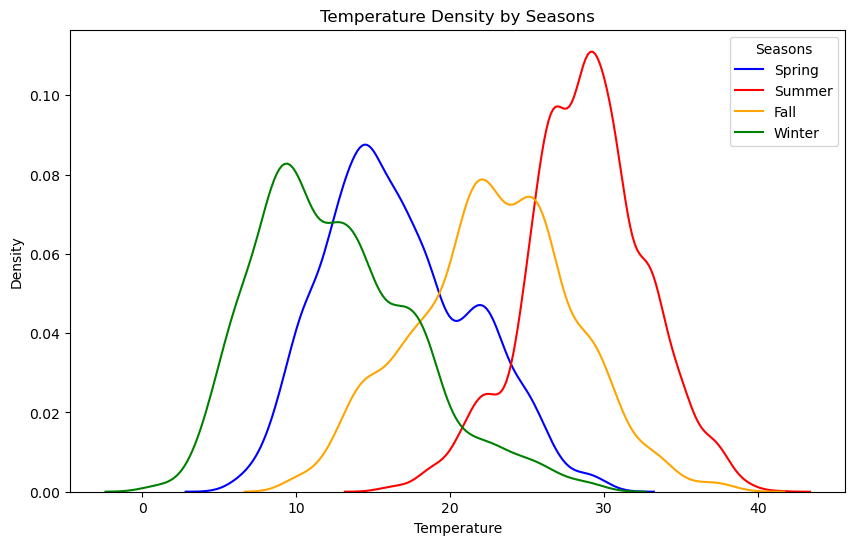

In [34]:
# Define custom colors for each season
season_colors = {
    'Spring': 'green',
    'Summer': 'orange',
    'Fall': 'red',
    'Winter': 'blue'
}

# Set up the plot
plt.figure(figsize=(10, 6))

# Create a kernel density plot of temperature by season with custom colors
sns.kdeplot(data=train, x='temp', hue='season', common_norm=False, palette=season_colors.values())
plt.title('Temperature Density by Seasons')
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.legend(title='Seasons', labels=season_colors.keys())

plt.show()

The graphs clearly show that humidity levels during spring are not appreciably high to significantly reduce bike rentals. Furthermore, temperatures are not too low to affect the number of rentals. In fact, during summer, both humidity and temperature are Significantly higher, this did not affect bicycle rentals. Likewise, the remaining seasons show similar levels of humidity and temperature as spring, though only spring has the lowest number of bicycle fares.

This indicates that weather conditions, while a contributing factor, may not be the only driver of lower rents during the spring season. It is plausible that the distribution of the data could influence this outcome. Spring may have a relatively smaller data set compared to other seasons, which can lead to observed fluctuations in rental numbers.

In [35]:
# Calculate the number of days in each season
days_in_season = train['season'].value_counts().sort_index()

# Display the number of days in each season
print("Number of days in each season:")
print(days_in_season)

Number of days in each season:
Fall      2733
Spring    2686
Summer    2733
Winter    2734
Name: season, dtype: int64


<Axes: ylabel='season'>

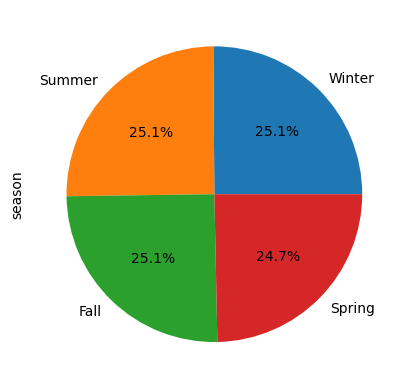

In [36]:
# Seeing the distribution of 'season' values in the train dataset
train['season'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')

In [37]:
# Dropping unnecessary features that are not needed for modeling or have minimal impact
train.drop(['datetime', 'atemp', 'windspeed', 'casual', 'registered'], axis=1, inplace=True)

In [38]:
# One hot Endocing .
train = pd.get_dummies(train, columns=['season', 'weather', 'month', 'day'])

# Label Encoding.
label_encoder = LabelEncoder()

for i in ['holiday', 'workingday', 'year']:
    train[i] = label_encoder.fit_transform(train[i])

In [39]:
# List of columns to scale
columns_to_scale = ['temp', 'humidity', 'hour']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the StandardScaler on the selected columns to calculate mean and standard deviation
scaler.fit(train[columns_to_scale])

# Transform the selected columns using the calculated mean and standard deviation
train[columns_to_scale] = scaler.transform(train[columns_to_scale])


In [40]:
# Split data into x and y.
X = train.drop("count", axis=1)
y = train["count"]

# Split train data into train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Define the Root Mean Squared Logarithmic Error (RMSLE) scorer
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, np.clip(y_pred, 0, None)))

# Make the RMSLE scorer
rmsle_scorer = make_scorer(rmsle)

In [42]:
# Initialize and evaluate different regression models using cross-validation
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

In [43]:
# Iterate over each model and Perform cross-validation with RMSLE scorer
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, scoring=rmsle_scorer, cv=5)
    
    print(f"Model: {model_name}")
    print(f"Average RMSLE: {np.mean(cv_scores)}\n")

Model: Linear Regression
Average RMSLE: 1.2981041544137404

Model: Decision Tree
Average RMSLE: 0.4291352487435294

Model: Random Forest
Average RMSLE: 0.3345494416408514



In [44]:
# Fit and evaluate the best model on the test set
the_model = RandomForestRegressor()  
the_model.fit(X_train, y_train)

y_pred = the_model.predict(X_test)
test_rmsle = rmsle(y_test, y_pred)
print(f"Test RMSLE for the best model: {test_rmsle}")

Test RMSLE for the best model: 0.32466987799985236


In [45]:
# Seeing if there are dublicated.
test.duplicated().sum()

0

In [46]:
# seeing if there are null values.
test.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [48]:
# Convert the 'datetime' column to datetime format
test['datetime'] = pd.to_datetime(test['datetime'])

# Extract the year from the 'datetime' column and create a new 'year' column
test['year'] = test['datetime'].dt.year

# Extract the month as its name from the 'datetime' column and create a new 'month' column
test['month'] = test['datetime'].dt.month_name()

# Extract the day as its name from the 'datetime' column and create a new 'day' column
test['day'] = test['datetime'].dt.day_name()

# Extract the hour from the 'datetime' column and create a new 'hour' column
test['hour'] = test['datetime'].dt.hour

In [49]:
# Replace the values in the 'season' column with corresponding strings
test['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}, inplace=True)

# Replace the values in the 'holiday' column with corresponding strings
test['holiday'].replace({1: 'Holiday', 0: 'Not Holiday'}, inplace=True)

# Replace the values in the 'workingday' column with corresponding strings
test['workingday'].replace({1: 'Workingday', 0: 'Not Workingday'}, inplace=True)

# Replace the values in the 'weather' column with corresponding strings
test['weather'].replace({1: 'Clear', 2: 'Mist', 3: 'Rain', 4: 'Snow'}, inplace=True)

In [50]:
# Define a mapping dictionary to combine the clusters
cluster_mapping = {"Snow" : "Rain"}

# Update the "grade" column with the new cluster labels
test['weather'] = test['weather'].replace(cluster_mapping)

In [51]:
# Numerical columns.
numerical_features = test[['temp', 'atemp', 'humidity', 'windspeed']]

# calculate descriptive statistics for numerical values.
numerical_features.describe()

,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000
mean,20.620607,24.012865,64.125212,12.631157
std,8.059583,8.782741,19.293391,8.250151
min,0.820000,0.000000,16.000000,0.000000
25%,13.940000,16.665000,49.000000,7.001500
50%,21.320000,25.000000,65.000000,11.001400
75%,27.060000,31.060000,81.000000,16.997900
max,40.180000,50.000000,100.000000,55.998600


In [52]:
# Replace zero 'windspeed' with the values above or below
test['windspeed'] = test['windspeed'].replace(0, method='ffill').replace(0, method='bfill')

In [53]:
#Store the datetime column in a separate variable.
datetime = test['datetime']

In [54]:
test.drop(['datetime', 'atemp', 'windspeed'], axis=1, inplace=True)

In [55]:
# One hot Endocing .
test = pd.get_dummies(test, columns=['season', 'weather', 'month', 'day'])

# Label Encoding.
label_encoder = LabelEncoder()

for i in ['holiday', 'workingday', 'year']:
    test[i] = label_encoder.fit_transform(test[i])

In [56]:
# List of columns to scale
columns_to_scale = ['temp', 'humidity', 'hour']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the StandardScaler on the selected columns to calculate mean and standard deviation
scaler.fit(test[columns_to_scale])

# Transform the selected columns using the calculated mean and standard deviation
test[columns_to_scale] = scaler.transform(test[columns_to_scale])


In [57]:
# Generate predictions for the test data using RandomForestClassifier.
test_pred = the_model.predict(test)

In [58]:
# Create a submission DataFrame with the 'datetime' column and predicted rental counts.
submission = pd.DataFrame({'datetime': datetime, 'count': test_pred})


In [59]:
# Save the submission DataFrame as a CSV file without including the index column.
submission.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
